**Neural Network Classification** :
Pedicting whether something is one thing or another

#### Types of classifications


*   Binary classification : Target can be one out of two options like email is spam or not , yes or no.
*   Multiclass classification : Target can be one out of  more than two options like decide whether the photo is of food , dog , person.
* Multi-label classification :
Target can be assigned more than one option like category of a movie thriller , romance , action.




In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
print(f"First 5 X features :\n{X[:5]}")
print(f"First 5 y labels :\n {y[:5]}")

First 5 X features :
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y labels :
 [1 1 1 1 0]


In [3]:
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
circles.label.value_counts()

,count
label,
1,500
0,500


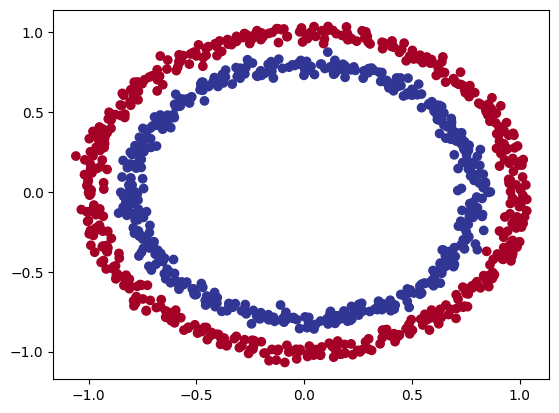

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [6]:
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shape for one sample of X:{X_sample.shape}and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shape for one sample of X:(2,)and the same for y: ()


In [8]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [10]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [28]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [29]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [30]:
untrained_preds = model_0(X_test.to(device))
print(f"Lenght of predictions : {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(y_test)}, shape : {y_test.shape}")
print(f"\n First 10 predcitions : \n{untrained_preds[:10]}")
print(f"\n First 10 test labels : \n{y_test[:10]}")

Lenght of predictions : 200, Shape : torch.Size([200, 1])
Length of test samples : 200, shape : torch.Size([200])

 First 10 predcitions : 
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], grad_fn=<SliceBackward0>)

 First 10 test labels : 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [31]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [32]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) *100
  return acc



```
Logits are the raw outputs(unmodified ) which the model produce when it takes input data then with the help of sigmoid or some other activation functions logits can be turned into labels
```



In [33]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], grad_fn=<SliceBackward0>)

In [34]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], grad_fn=<SigmoidBackward0>)

In [35]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)))[:5]

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch % 10 ==0:
    print(f"Epoch : {epoch} |  Loss : {loss:.5f} , Accuracy:{acc:.2f}% | Test loss : {test_loss:.5f}, Test acc : {test_acc:.2f}")

Epoch : 0 |  Loss : 0.69796 , Accuracy:51.88% | Test loss : 0.69440, Test acc : 58.00
Epoch : 10 |  Loss : 0.69590 , Accuracy:51.25% | Test loss : 0.69305, Test acc : 53.00
Epoch : 20 |  Loss : 0.69490 , Accuracy:51.62% | Test loss : 0.69254, Test acc : 49.50
Epoch : 30 |  Loss : 0.69435 , Accuracy:51.12% | Test loss : 0.69236, Test acc : 49.50
Epoch : 40 |  Loss : 0.69401 , Accuracy:50.88% | Test loss : 0.69232, Test acc : 51.00
Epoch : 50 |  Loss : 0.69378 , Accuracy:50.25% | Test loss : 0.69234, Test acc : 50.00
Epoch : 60 |  Loss : 0.69362 , Accuracy:50.00% | Test loss : 0.69239, Test acc : 51.50
Epoch : 70 |  Loss : 0.69351 , Accuracy:50.25% | Test loss : 0.69246, Test acc : 51.00
Epoch : 80 |  Loss : 0.69342 , Accuracy:49.88% | Test loss : 0.69254, Test acc : 50.00
Epoch : 90 |  Loss : 0.69336 , Accuracy:49.88% | Test loss : 0.69262, Test acc : 53.00


In [38]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping downloading part")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions , plot_decision_boundary

helper_functions.py already exists , skipping downloading part


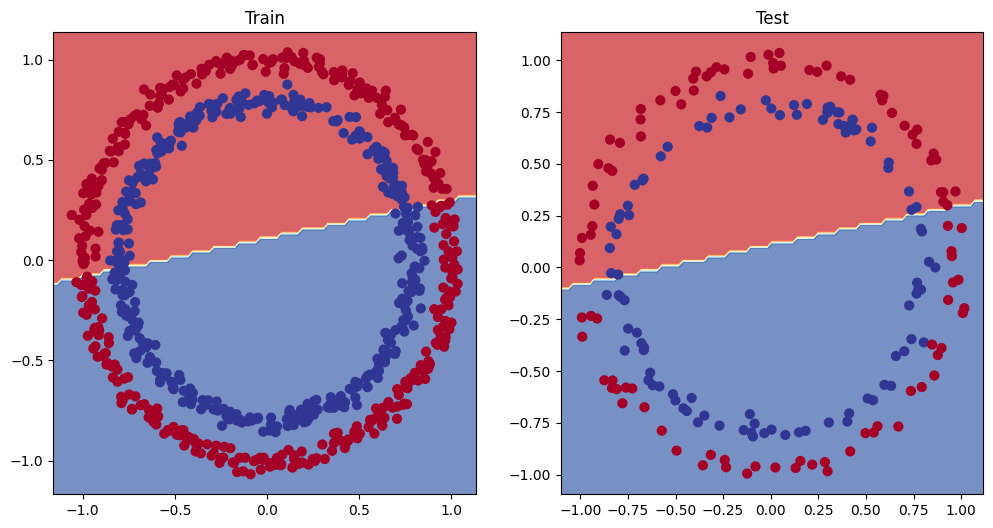

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [41]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs) :
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred = test_pred)
    if epoch % 10 ==0:
      print(f"Epoch : {epoch} | loss : {loss:.2f},Accuracy:{acc:.2f} | Test loss :{test_loss:.2f} ,Test acc : {test_loss:.2f}")

Epoch : 0 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 10 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 20 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 30 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 40 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 50 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 60 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 70 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 80 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69
Epoch : 90 | loss : 0.69,Accuracy:50.88 | Test loss :0.69 ,Test acc : 0.69


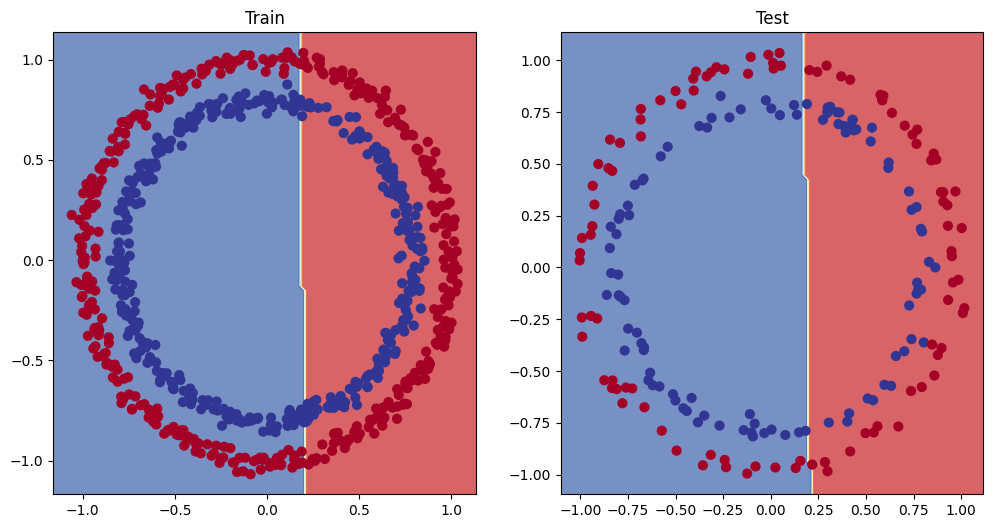

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)


In [47]:
weight = 0.7
bias = 0.3
start =0
end=1
step =0.01

X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5] , y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [48]:
train_split = int(0.8*len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))


80 80 20 20


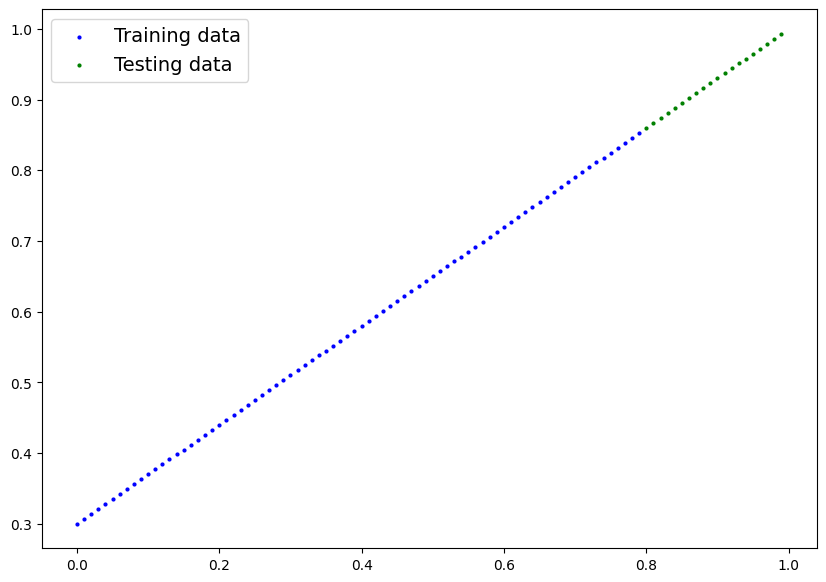

In [49]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [50]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=100),
    nn.Linear(in_features=100,out_features=100),
    nn.Linear(in_features=100,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=100, bias=True)
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [51]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)


In [57]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.03982, Test loss: 0.12349
Epoch: 100 | Train loss: 0.06612, Test loss: 0.13237
Epoch: 200 | Train loss: 0.14052, Test loss: 0.01274
Epoch: 300 | Train loss: 0.03324, Test loss: 0.13013
Epoch: 400 | Train loss: 0.09508, Test loss: 0.15677
Epoch: 500 | Train loss: 0.03757, Test loss: 0.11011
Epoch: 600 | Train loss: 0.00167, Test loss: 0.06224
Epoch: 700 | Train loss: 0.05984, Test loss: 0.02440
Epoch: 800 | Train loss: 0.02906, Test loss: 0.11282
Epoch: 900 | Train loss: 0.03278, Test loss: 0.15141


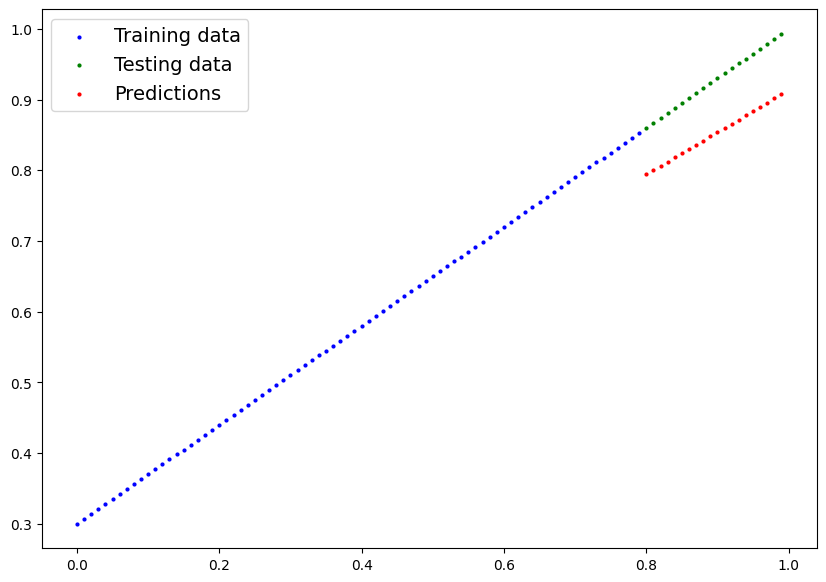

In [58]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());